Creates a graphical comparison of vertical alignments from IFC-Rail-Unit-Test-Reference-Code and IfcOpenShell
Before running this script, run the "ConvertVerticalAlignment_IfcOpenShell_IfcRailwayRoom_US_Units" script to generate the US unit files

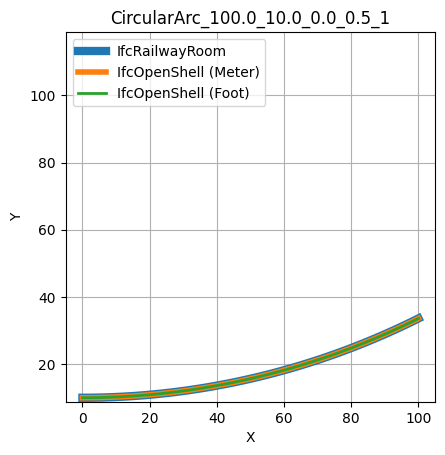

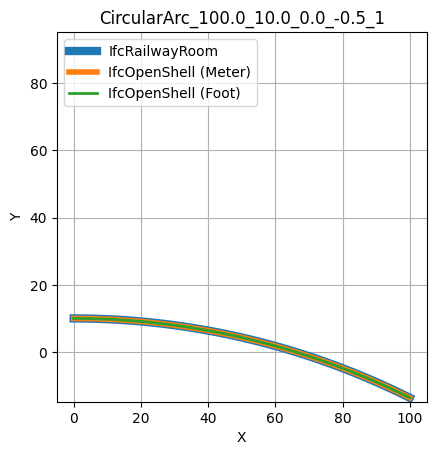

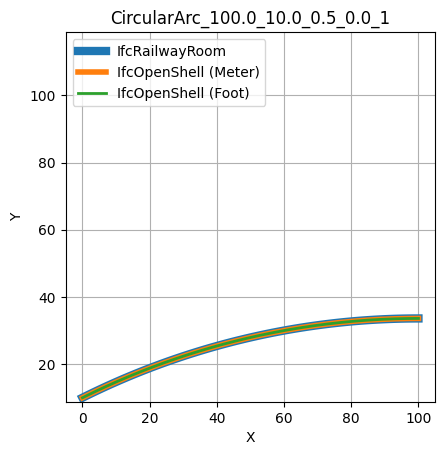

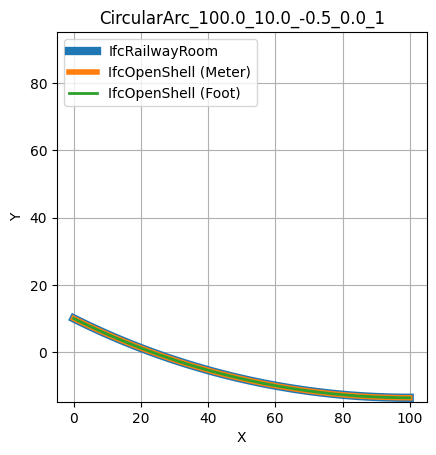

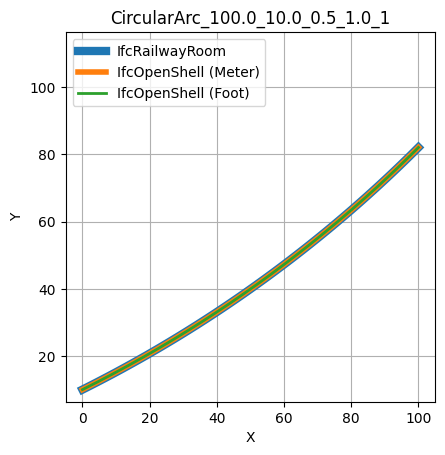

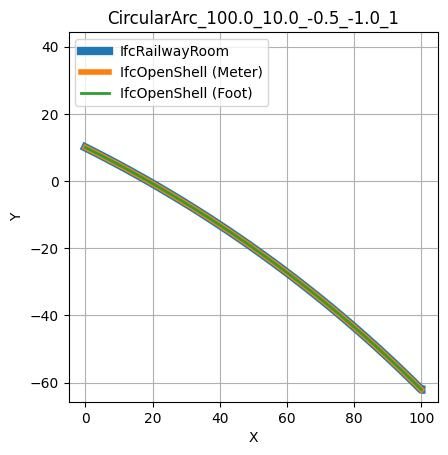

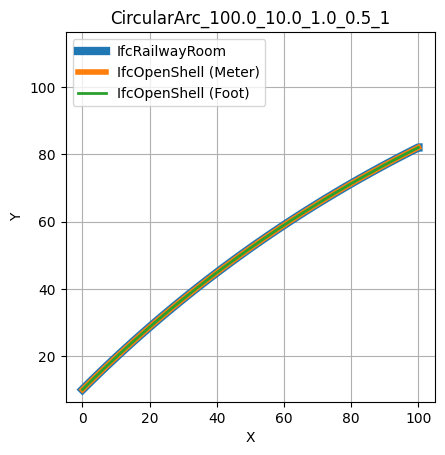

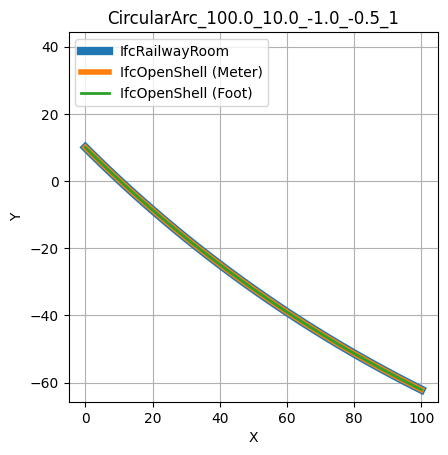

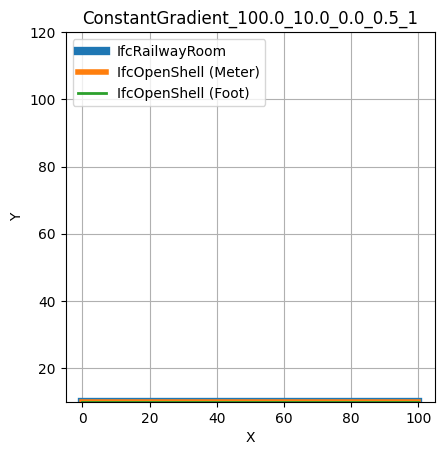

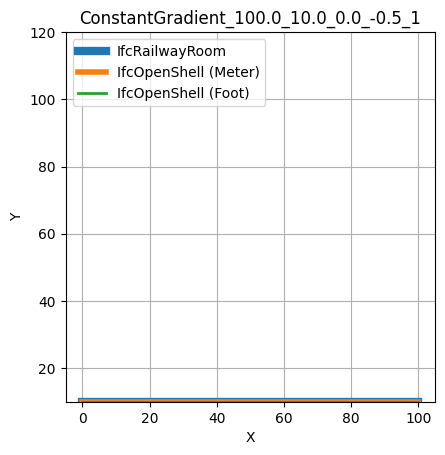

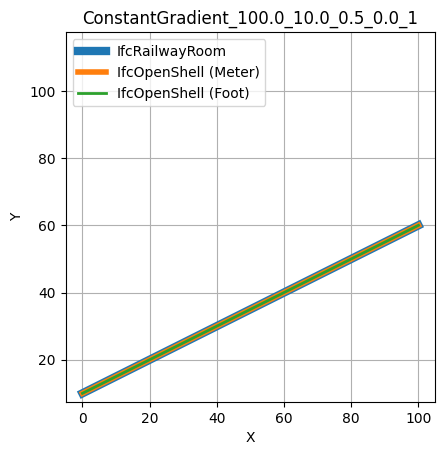

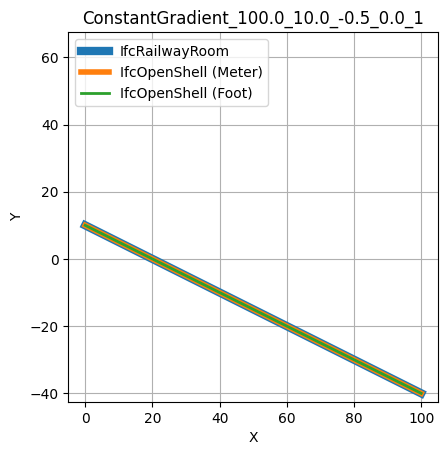

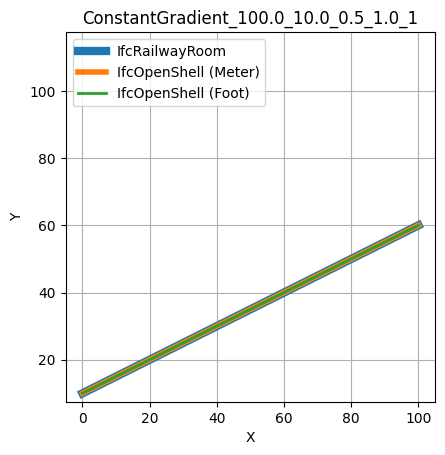

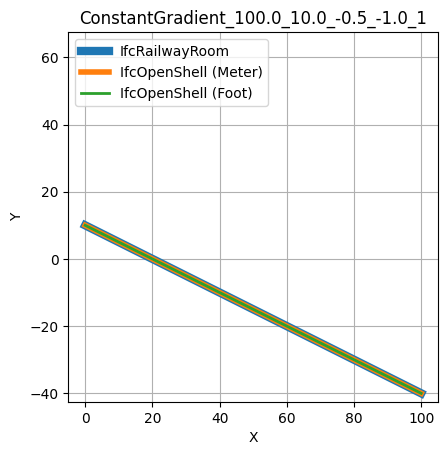

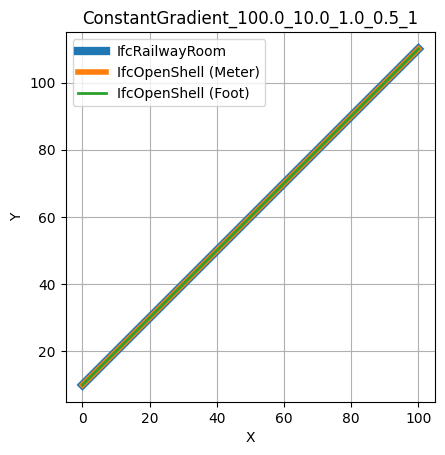

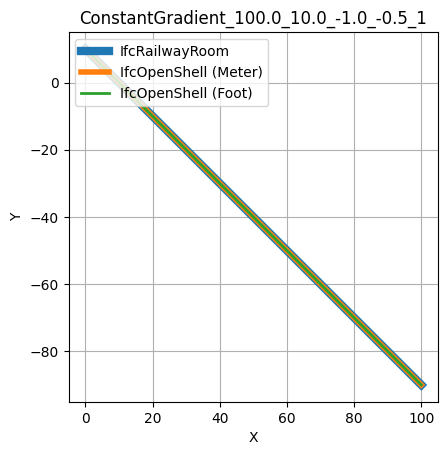

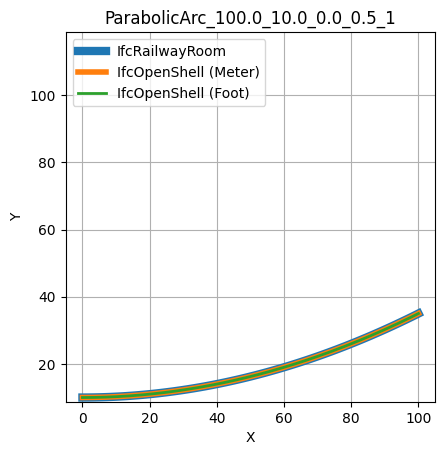

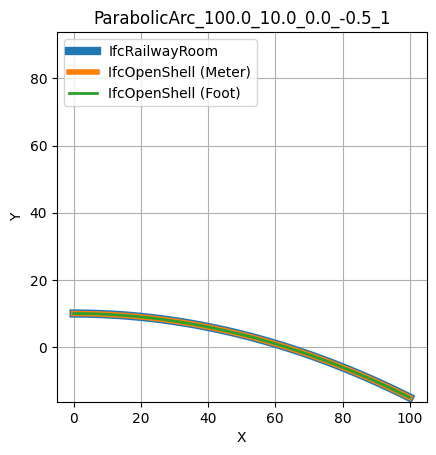

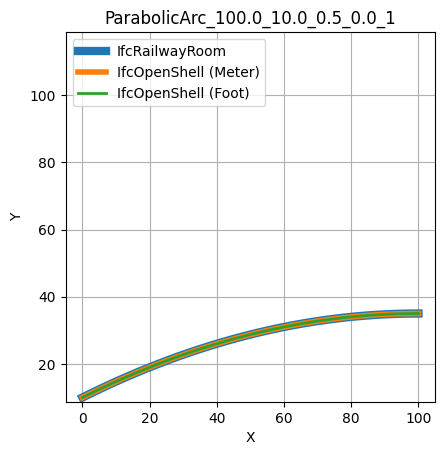

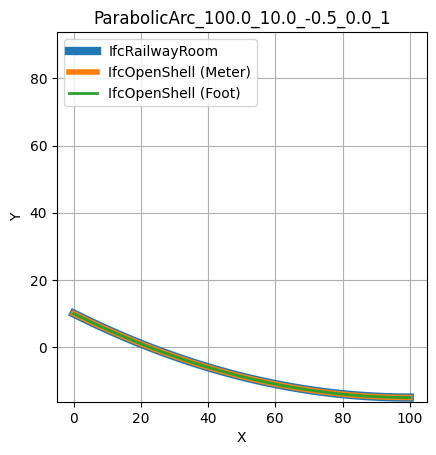

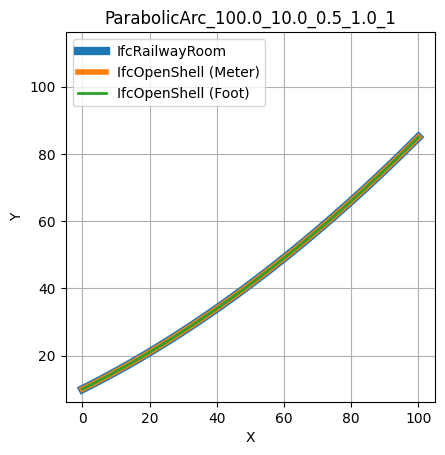

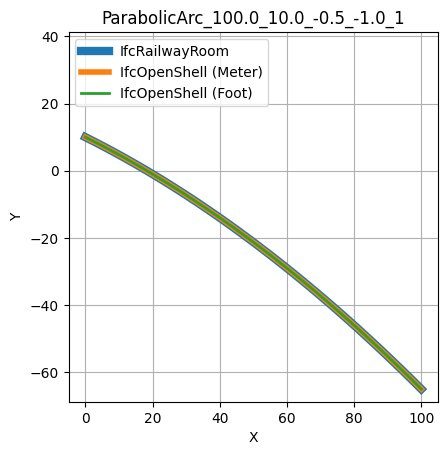

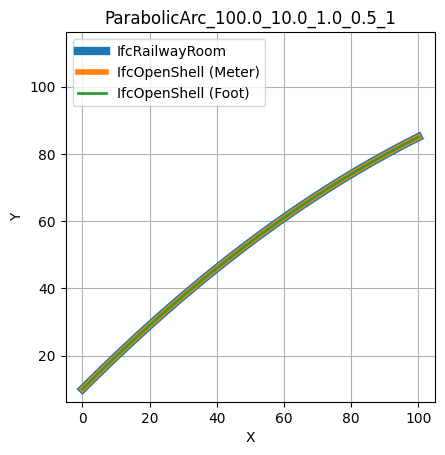

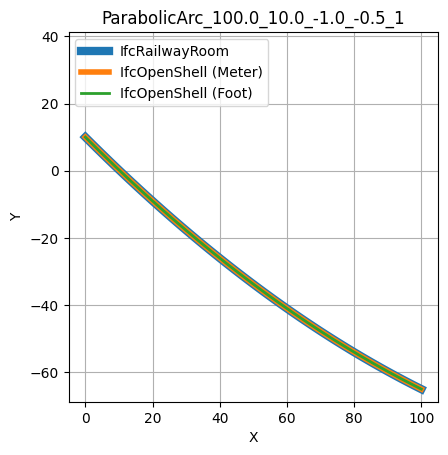

In [4]:
import ifcopenshell
import ifcopenshell.geom as geom
import numpy as np
import matplotlib.pyplot as plt

#curve_types = ["CircularArc","Clothoid","ConstantGradient","ParabolicArc"]
curve_types = ["CircularArc","ConstantGradient","ParabolicArc"]

for curve_type in curve_types:
    test_cases = []
    test_cases.append(curve_type + "_100.0_10.0_0.0_0.5_1_Meter")
    test_cases.append(curve_type + "_100.0_10.0_0.0_-0.5_1_Meter")
    test_cases.append(curve_type + "_100.0_10.0_0.5_0.0_1_Meter")
    test_cases.append(curve_type + "_100.0_10.0_-0.5_0.0_1_Meter")
    test_cases.append(curve_type + "_100.0_10.0_0.5_1.0_1_Meter")
    test_cases.append(curve_type + "_100.0_10.0_-0.5_-1.0_1_Meter")
    test_cases.append(curve_type + "_100.0_10.0_1.0_0.5_1_Meter")
    test_cases.append(curve_type + "_100.0_10.0_-1.0_-0.5_1_Meter")
    
    for test_case in test_cases:
        filename = "F:/IFC-Rail-Unit-Test-Reference-Code/alignment_testset/IFC-WithGeneratedGeometry/GENERATED__VerticalAlignment_" + test_case + ".ifc"
        si_model = ifcopenshell.open(filename)

        filename = filename.replace("Meter","Foot")
        us_model = ifcopenshell.open(filename)

        results_file = "F:/IFC-Rail-Unit-Test-Reference-Code/alignment_testset/ToolboxProcessed/VerticalAlignment/" + curve_type + "/" + test_case + ".txt"
        with open(results_file,'r') as f:
            lines = f.readlines()[2:] # skip the first two header lines
        
        x_values = []
        z_values = []
        for line in lines:
            s,x,y,z = map(float,line.split())
            x_values.append(x)
            z_values.append(z)
        
        fig1 = plt.figure().add_subplot()
        fig1.plot(x_values,z_values,label="IfcRailwayRoom",linewidth=6)
        
        curves = [si_model.by_type("IfcGradientCurve",False),us_model.by_type("IfcGradientCurve",False)]
       
        settings = geom.settings()
        
        units = ["Meter","Foot"]
        lw = [4,2]
        for i in range(2):
            for curve in curves[i]:
                shape = geom.create_shape(settings,curve)
                verts = shape.verts
                verts = np.array(verts).reshape((-1,3))
                x,y,z = verts.T
                fig1.plot(x,z,label="IfcOpenShell (" + units[i] + ")",linewidth=lw[i])
            
        fig1.set_title(test_case.replace("_Meter",""))
        fig1.legend(loc="upper left")
        fig1.axis("square")
        fig1.set_xlabel("X")
        fig1.set_ylabel("Y")
        fig1.grid(True)
        plt.show()
